In [1]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Reading the dataset
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
# Checking for Null Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


OBSERVATION 1: No Null Values

In [4]:
# Replacing Profit with Profit Percentage
data['Profit%']=(data['Profit']/data['Sales'])*100
data.drop(['Profit','Sales'],axis=1,inplace=True)
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Quantity,Discount,Profit%
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,2,0.00,16.00
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,3,0.00,30.00
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,2,0.00,47.00
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,5,0.45,-40.00
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,2,0.20,11.25


In [5]:
# Quick Statistical Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9994.0,55190.379428,32063.693350,1040.0,23223.0,56430.5,90008.00,99301.0
Quantity,9994.0,3.789574,2.225110,1.0,2.0,3.0,5.00,14.0
Discount,9994.0,0.156203,0.206452,0.0,0.0,0.2,0.20,0.8
Profit%,9994.0,12.031393,46.675435,-275.0,7.5,27.0,36.25,50.0


OBSERVATION 2: We can see that Profit% is having Negative values(LOSS)

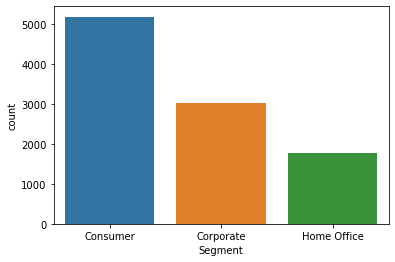

In [6]:
# Types of Segments
sns.countplot(data['Segment'])

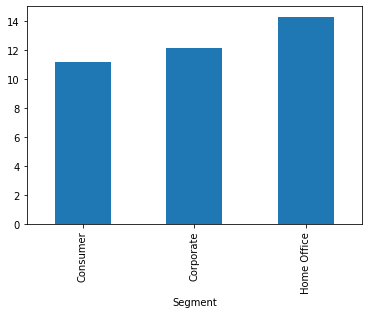

In [7]:
# Grouping Segments with respect to Average value of Profit%
df=data.copy()
df.groupby('Segment')['Profit%'].mean().plot.bar()
plt.show()

OBSERVATION 3: We see that Consumer Segment has Lowest Profit%

In [8]:
# Creating 3 diff. datasets for Individual Segments
consumer_data=data[data['Segment']=='Consumer']
corporate_data=data[data['Segment']=='Corporate']
office_data=data[data['Segment']=='Home Office']

In [9]:
# Finding No. of Unique Values in Categorical Features
for feature in data.columns:
    if data[feature].dtypes=='O':
        print(feature,len(data[feature].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Region 4
Category 3
Sub-Category 17


In [10]:
# According to above Compution we can see that these are the feature that might be useful to us.
features=['State','Category','Sub-Category',]


## For Consumer Segment

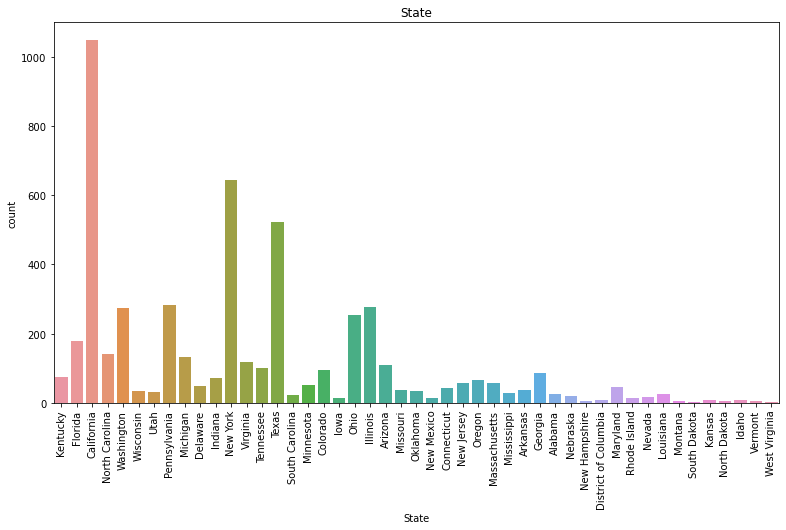

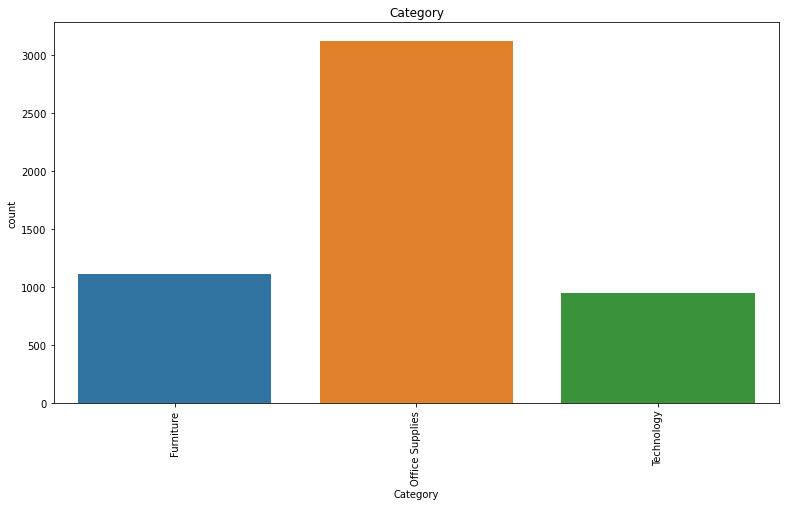

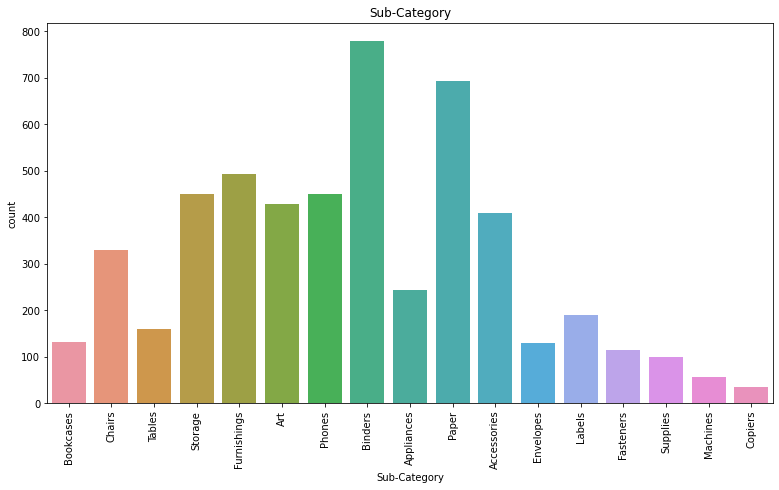

In [11]:
# No. of transactions for each Category
for feature in features:
    df=consumer_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    sns.countplot(df[feature])
    plt.show()

OBSERVATION 4: 
    1. State - ['California','New York']
    2. Category - ['Office Supplies']
    3. Sub-Category - ['Binders','Paper']
    
    These are the Categories with high transactions, 
    Furniture and Technology Sales are low
    

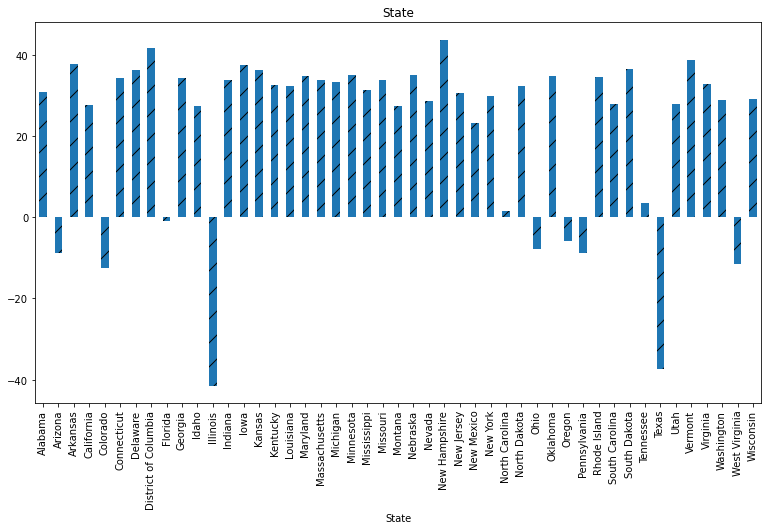

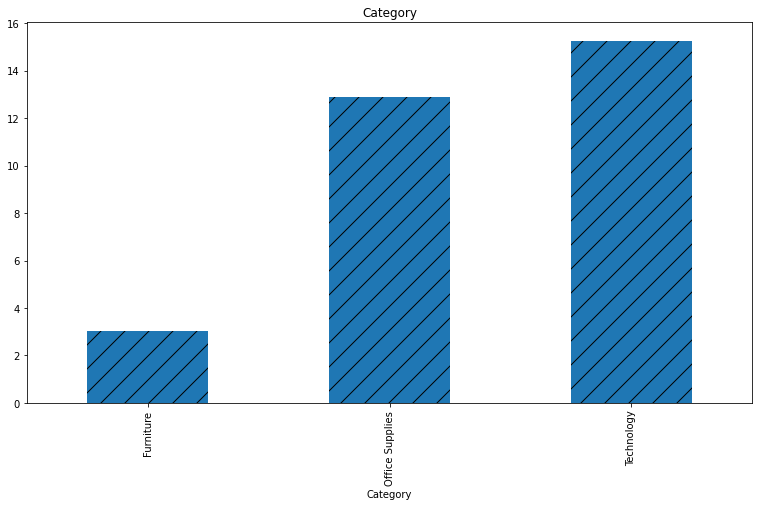

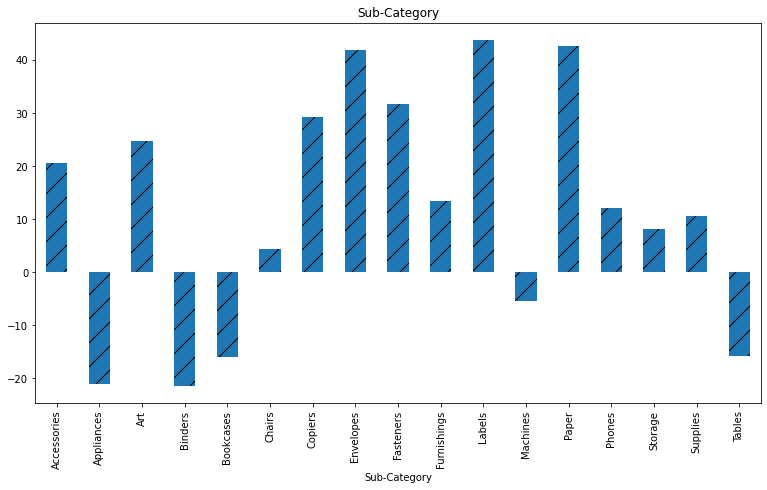

In [12]:
for feature in features:
    df=consumer_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    df.groupby(feature)['Profit%'].mean().plot.bar(hatch='/')
    plt.show()

OBSERVATION 5: 
    1. State - ['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia']
    2. Sub-Category - ['Appliances' , 'Binders' , 'Bookcases' , 'Machines' , 'Tables']
    
    These are the Categories giving Negative Profit,
    Low Profit in Furniture

## For Corporate Segment

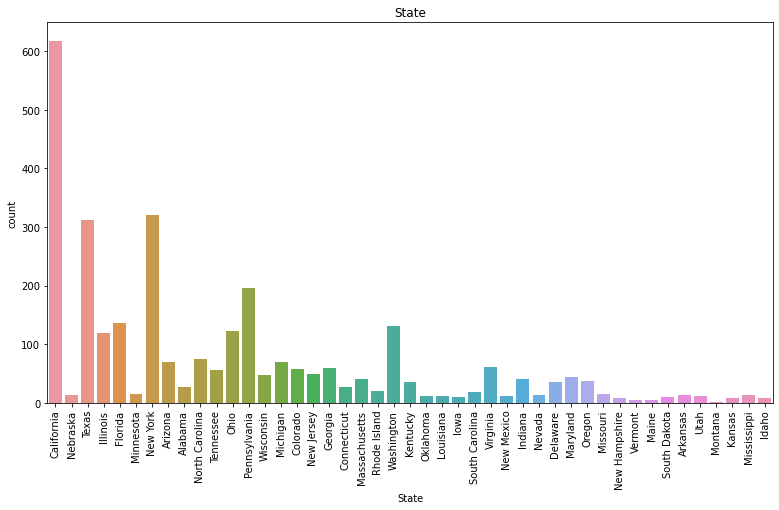

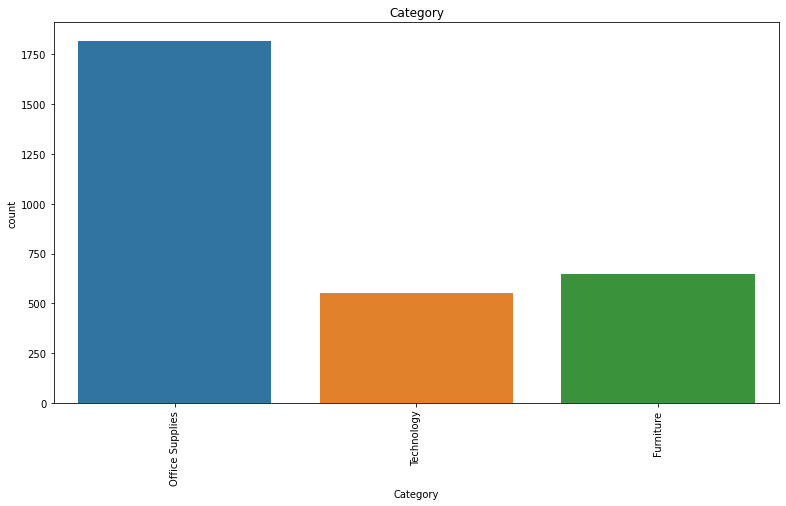

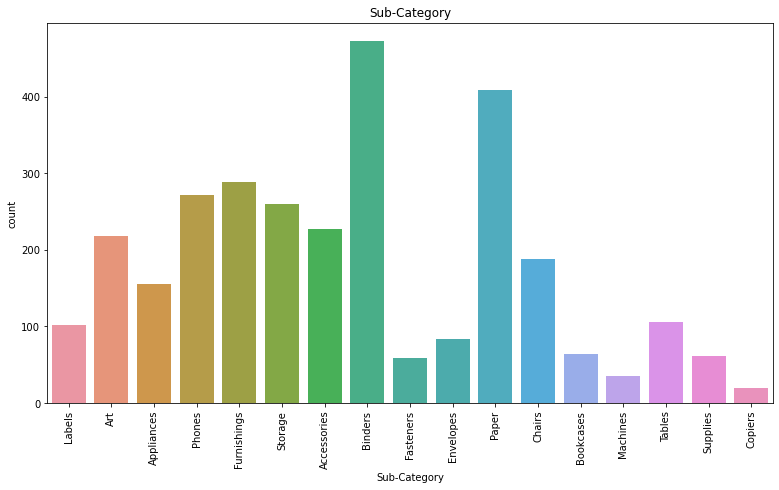

In [13]:
for feature in features:
    df=corporate_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    sns.countplot(df[feature])
    plt.show()

OBSERVATION 4: 
    1. State - ['California']
    2. Category - ['Office Supplies']
    3. Sub-Category - ['Binders','Paper']
    
    These are the Categories with high transactions, 
    Furniture and Technology Sales are low
    

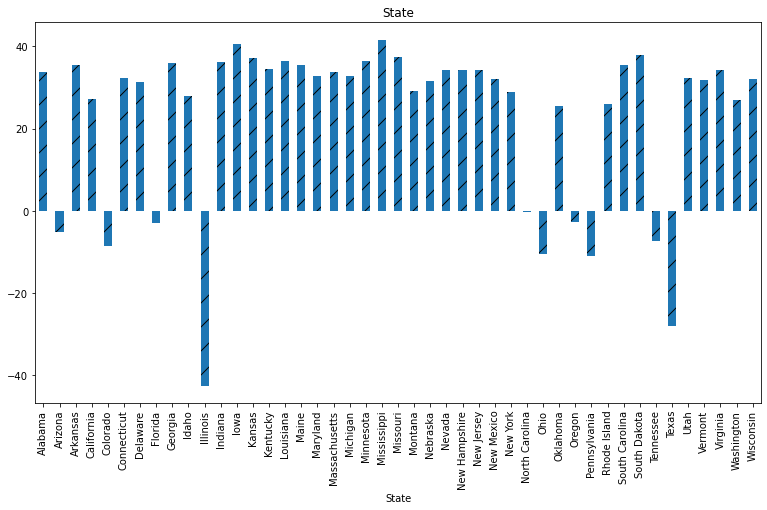

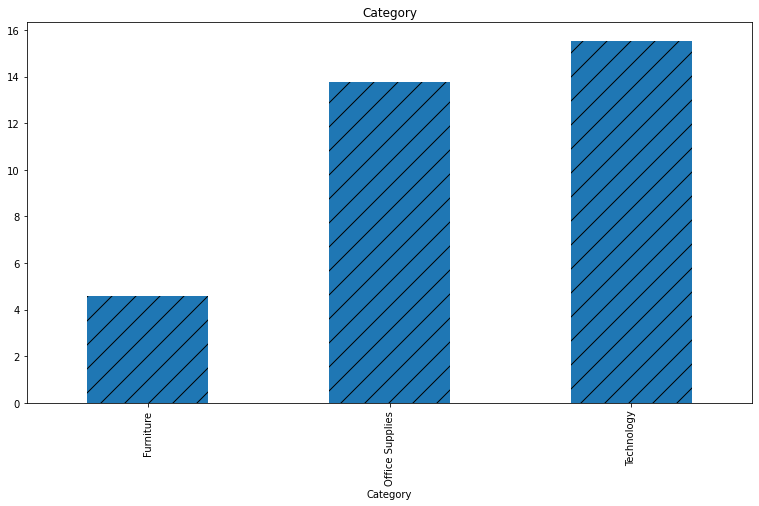

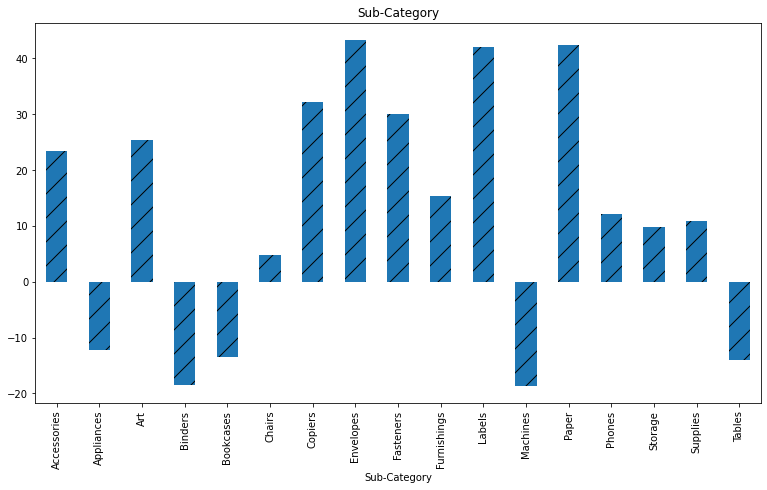

In [14]:
for feature in features:
    df=corporate_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    df.groupby(feature)['Profit%'].mean().plot.bar(hatch='/')
    plt.show()

OBSERVATION 5: 
    1. State - ['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia']
    2. Sub-Category - ['Appliances' , 'Binders' , 'Bookcases' , 'Machines' , 'Tables']
    
    These are the Categories giving Negative Profit,
    Low Profit in Furniture

## For Home Office Segment

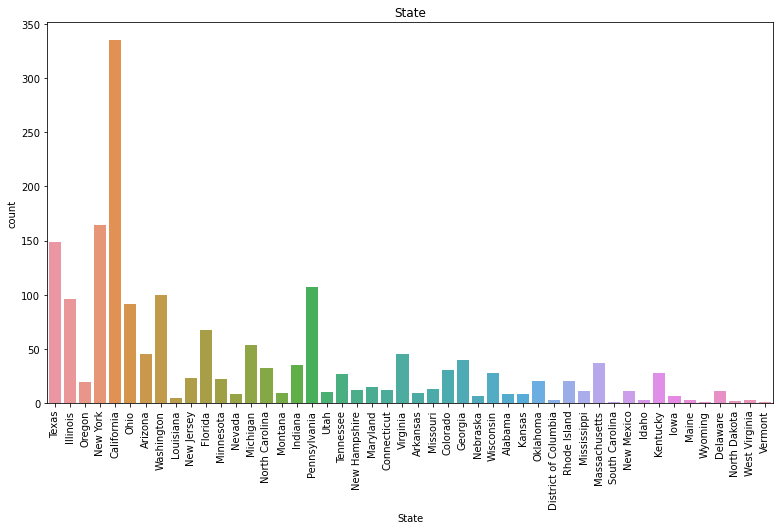

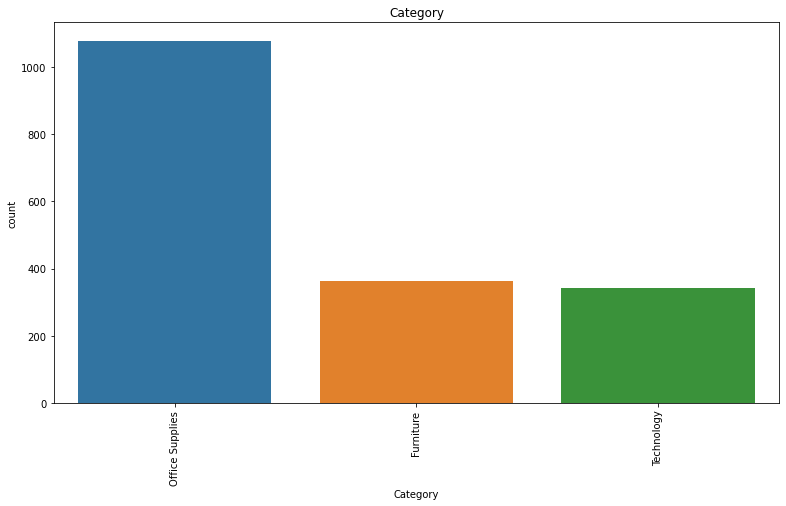

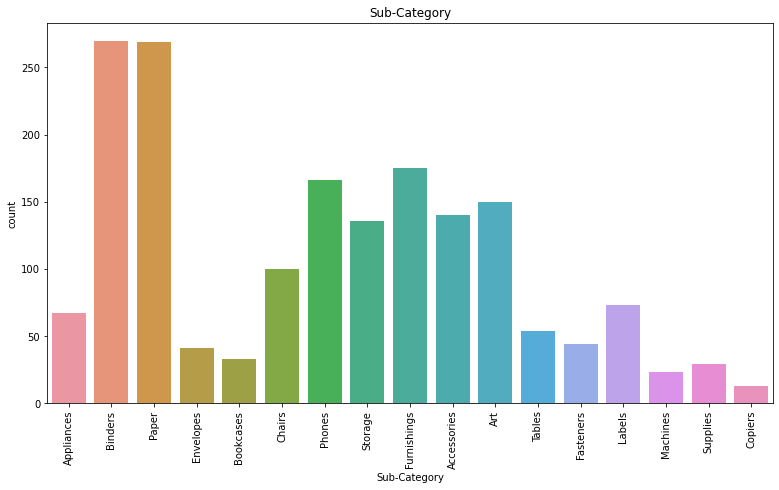

In [15]:
for feature in features:
    df=office_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    sns.countplot(df[feature])
    plt.show()

OBSERVATION 4: 
    1. State - ['California','New York']
    2. Category - ['Office Supplies']
    3. Sub-Category - ['Binders','Paper']
    
    These are the Categories with high transactions, 
    Furniture and Technology Sales are low
    

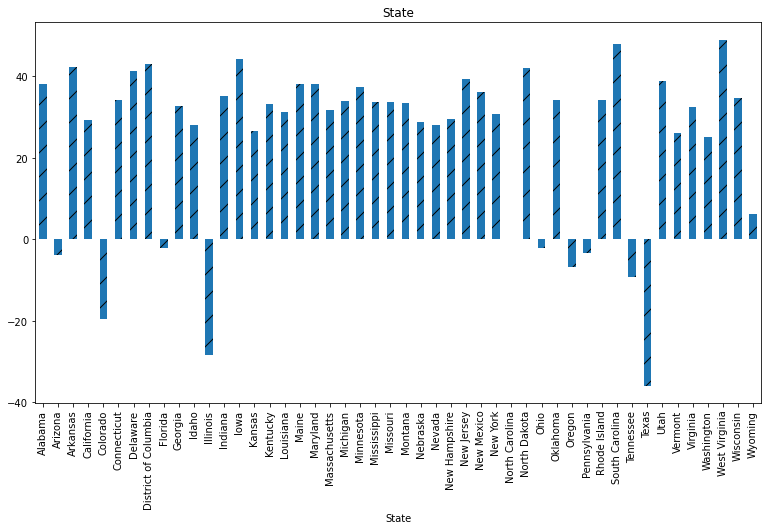

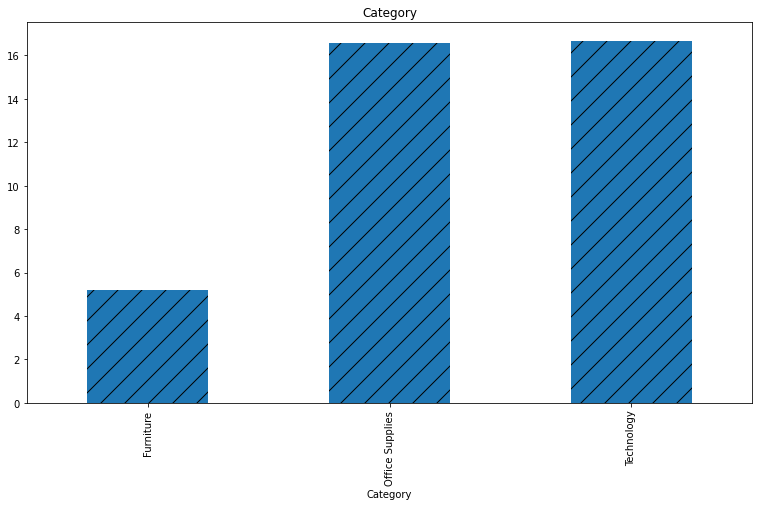

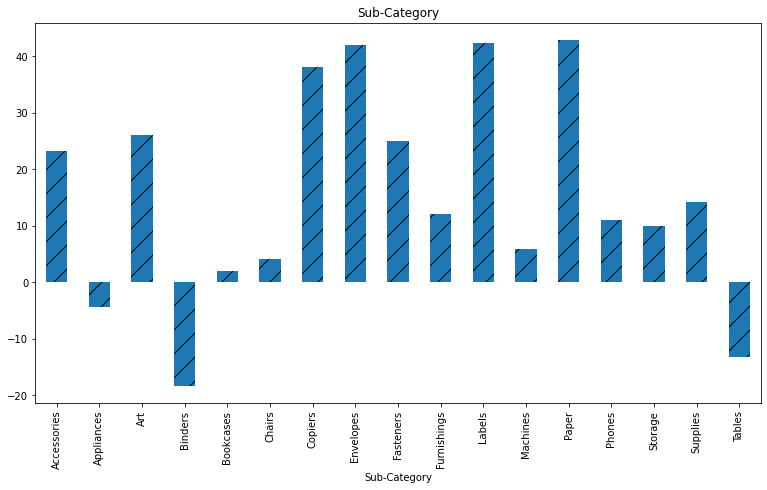

In [16]:
for feature in features:
    df=office_data.copy()
    plt.figure(figsize=[13,7])
    plt.xticks(rotation=90)
    plt.title(feature)
    df.groupby(feature)['Profit%'].mean().plot.bar(hatch='/')
    plt.show()

OBSERVATION 5: 
    1. State - ['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia']
    2. Sub-Category - ['Appliances' , 'Binders' , 'Tables']
    
    These are the Categories giving Negative Profit,
    Low Profit in Furniture

In [17]:
data.corr()

,Postal Code,Quantity,Discount,Profit%
Postal Code,1.000000,0.012761,0.058443,-0.064404
Quantity,0.012761,1.000000,0.008623,-0.005280
Discount,0.058443,0.008623,1.000000,-0.864452
Profit%,-0.064404,-0.005280,-0.864452,1.000000


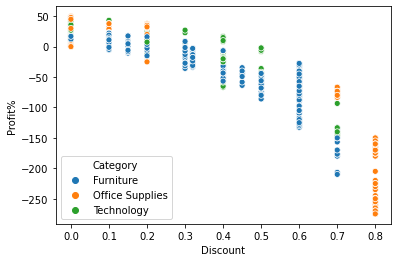

In [18]:
sns.scatterplot(x='Discount',y='Profit%',data=data,hue='Category')

OBSERVATION 10: According to our Scatter plot we can say that there is negative correlation between Discount and Profit%

Discount increases Profit% decreases
Discount on Office Supplies is giving -ve Profit

# Conclusion:-

-------------------------------------------------------------------------------------------------------------------------------

### 1) Furniture Profit is very Low (Refer OBSERVATION 4)
####      Sol :- Sales of Furniture should be Increased


----

### 2) States like ['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia'] are having -ve Profit (Refer OBSERVATION 5)
####      Sol:- Sales in States like ['Arizona','Colorado','Florida','Illinois','Ohio','Oregon','Pennsylvania','Texas','West Virginia'] should increase

-----

### 3) High Discount is giving -ve Profit, Specially in case of Office Supplies (Refer OBSERVATION 10)
####      Sol:- High Discount like above 0.5 should be avoided

-----


### 4) Sub-Categories like ['Appliances' , 'Binders' , 'Bookcases' , 'Machines' , 'Tables'] are also giving -ve Profit (Refer OBSERVATION 5)
####      Sol:- This might be because subcategories responsible for major -ve Profit that are ['Appliances' , 'Binders'] falls under Office Supplies Category which is a consequence of high discount, so following 3rd solution might work for this problem too. i.e. working on discounts


----

### 5) Additional Hidden Insight (Refer OBSERVATION 4 and 5):-
####     Incase of Technology category, Dispite of having the lowest sales it is still giving the highest Profit. That means on increasing sales of Products falling in the category of Technology will give our Superstore a big Profit.